# Building Knowledge Graph RAG with LlamaIndex

By the end of this notebook, you'll be able to:
1. The [Basic Steps](https://www.bilibili.com/read/cv29149540/) for Building the Knowledge Graph RAG in LlamaIndex.
2. Configure Neo4j Graph database and build a Knowledge Graph RAG with [Neo4jGraphStore](https://docs.llamaindex.ai/en/stable/examples/index_structs/knowledge_graph/Neo4jKGIndexDemo.html)
3. Congifure Nebula Graph database and build a Knowledge Graph RAG with [NebulaGraphStore](https://docs.llamaindex.ai/en/stable/examples/index_structs/knowledge_graph/NebulaGraphKGIndexDemo.html)

> 🚀 [Nebulagraph Workshop Notebook](https://bit.ly/graph-rag-workshop)

> 🚀 [Graph_RAG_LlamaIndex_Workshop](https://colab.research.google.com/drive/1tLjOg2ZQuIClfuWrAC2LdiZHCov8oUbs#scrollTo=4x1mALA1B_-T)

## Basic Steps for Building the Knowledge Graph
```

### Import Packages
from llama_index import SimpleDirectoryReader, ServiceContext, KnowledgeGraphIndex
from llama_index.storage.storage_context import StorageContext
from llama_index.llms import OpenAI
from llama_index.graph_stores import SimpleGraphStore, Neo4jGraphStore, NebulaGraphStore

### Load documents
documents = SimpleDirectoryReader(file_dir).load_data()

### Configure service_context and storage_context
llm = OpenAI(temperature=0,)
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=512)
graph_store = SimpleGraphStore() #Neo4jGraphStore,NebulaGraphStore


storage_context = StorageContext.from_defaults(graph_store=graph_store)

### Create Index
index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
)
### Create query_engine
query_engine = index.as_query_engine(
    include_text=False, response_mode="tree_summarize"
)
### Query with query_engine
response = query_engine.query(
    "Tell me more about Graph-RAG",
)

### Prepare Neo4jGraphStore
graph_store = Neo4jGraphStore(
    username="neo4j",
    password="LDAARWSFFASDEFPIFJCe20sd1sCd32v",
    url="neo4j+s://instance_id.databases.neo4j.io",
    database="neo4j",
)

### Prepare NebulaGraphStore


# Run the code in Nebula Studio
CREATE SPACE llamaindex(vid_type=FIXED_STRING(256), partition_num=1, replica_factor=1);
:sleep 10;
USE llamaindex;
CREATE TAG entity(name string);
CREATE EDGE relationship(relationship string);
CREATE TAG INDEX entity_index ON entity(name(256));

os.environ["NEBULA_USER"] = "root"
os.environ["NEBULA_PASSWORD"] = "nebula"  # default is "nebula"
os.environ[
    "NEBULA_ADDRESS"
] = "127.0.0.1:9669"

space_name = "your space name" #
edge_types, rel_prop_names = ["relationship"], [
    "relationship"
]  # default, could be omit if create from an empty kg
tags = ["entity"]

graph_store = NebulaGraphStore(
    space_name=space_name,
    edge_types=edge_types,
    rel_prop_names=rel_prop_names,
    tags=tags,
)

bilibili
```
作者：可乐i_Klay
出处：https://www.bilibili.com/read/cv29149540/

## Import libraries


In [ ]:
!pip install python-dotenv transformers neo4j llama-index ipython-ngql nebula3-python networkx pyvis torch unstructured llama-hub sentence-transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

## Configuration

In [ ]:
import logging
import sys, os
import warnings
# Supress warnings
warnings.filterwarnings("ignore")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [ ]:
My OpenAI Key

os.environ["OPENAI_API_KEY"] = ""


In [ ]:
from llama_index import ServiceContext, VectorStoreIndex
from llama_index.llms import OpenAI
# from llama_index.embeddings import HuggingFaceEmbedding

# define LLM
llm = OpenAI()

# embed_model="local:BAAI/bge-small-en-v1.5"
service_context = ServiceContext.from_defaults(
    llm=llm,
    # embed_model=embed_model,
    chunk_size=512
)

from llama_index import set_global_service_context
set_global_service_context(service_context)


## Load Data

In [ ]:
# download data
!wget https://www.dropbox.com/scl/fi/fqyvmodovgk21p06giezu/Tesla-10-K-2022-Filing.html .

In [ ]:

from llama_hub.file.unstructured.base import UnstructuredReader
from pathlib import Path
from llama_index import Document
from llama_index.node_parser import SimpleNodeParser

loader = UnstructuredReader()
documents = loader.load_data(
        file=Path(f"Tesla-10-K-2022-Filing.html")
    )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# # As an alternative for the sake of cost saving if using OpenAI

# from llama_index import download_loader

# WikipediaReader = download_loader("WikipediaReader")

# loader = WikipediaReader()

# documents = loader.load_data(pages=['Guardians of the Galaxy Vol. 3'], auto_suggest=False)

## Basic Vecotor Index and Query Engine

In [ ]:

from llama_index import VectorStoreIndex

vector_index = VectorStoreIndex.from_documents(documents, service_context=service_context)
baseline_engine = vector_index.as_query_engine()

query = 'what is the gross cost of operating lease vehicles as of december 31, 2022?' # Should be $6.08 billion
ress = baseline_engine.query(query)

print(f'Question: {query}:\n\nAnswer: {ress.response}')


Question: what is the gross cost of operating lease vehicles as of december 31, 2022?:

Answer: The gross cost of operating lease vehicles as of December 31, 2022 is $6.08 billion.


## Using Knowledge Graph with SimpleGraphStore


In [ ]:
## https://docs.llamaindex.ai/en/stable/examples/index_structs/knowledge_graph/KnowledgeGraphDemo.html

from llama_index.storage.storage_context import StorageContext
from llama_index.graph_stores import SimpleGraphStore
from llama_index import KnowledgeGraphIndex

graph_store = SimpleGraphStore() #In-memory
storage_context = StorageContext.from_defaults(graph_store=graph_store)

# NOTE: can take a while!
index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
    # include_embeddings=True, # Query with embeddings
)

basic_kg_engine = index.as_query_engine(include_text=False, response_mode="tree_summarize")
# basic_kg_engine = index.as_query_engine(include_text=False, response_mode="tree_summarize", embedding_mode="hybrid", similarity_top_k=5,) # Query with embeddings

query = 'what is the gross cost of operating lease vehicles as of december 31, 2022?' # Should be $6.08 billion
ress = basic_kg_engine.query(query)

print(f'Question: {query}:\n\nAnswer: {ress.response}')

Question: what is the gross cost of operating lease vehicles as of december 31, 2022?:

Answer: The gross cost of operating lease vehicles as of December 31, 2022 cannot be determined based on the provided context information.


### *Visualization*

In [ ]:
from pyvis.network import Network

g = index.get_networkx_graph()
net = Network(notebook=True, cdn_resources="in_line", directed=True)
net.from_nx(g)
net.show('/content/example.html')

import IPython
IPython.display.HTML(filename='/content/example.html')


## Using Knowledge Graph with Neo4jGraphStore



### Prepare for Neo4j: Create a Neo4j Database

Create a Neo4j Database [Tutorial](https://www.bilibili.com/read/cv29118130).

Example **bold text**

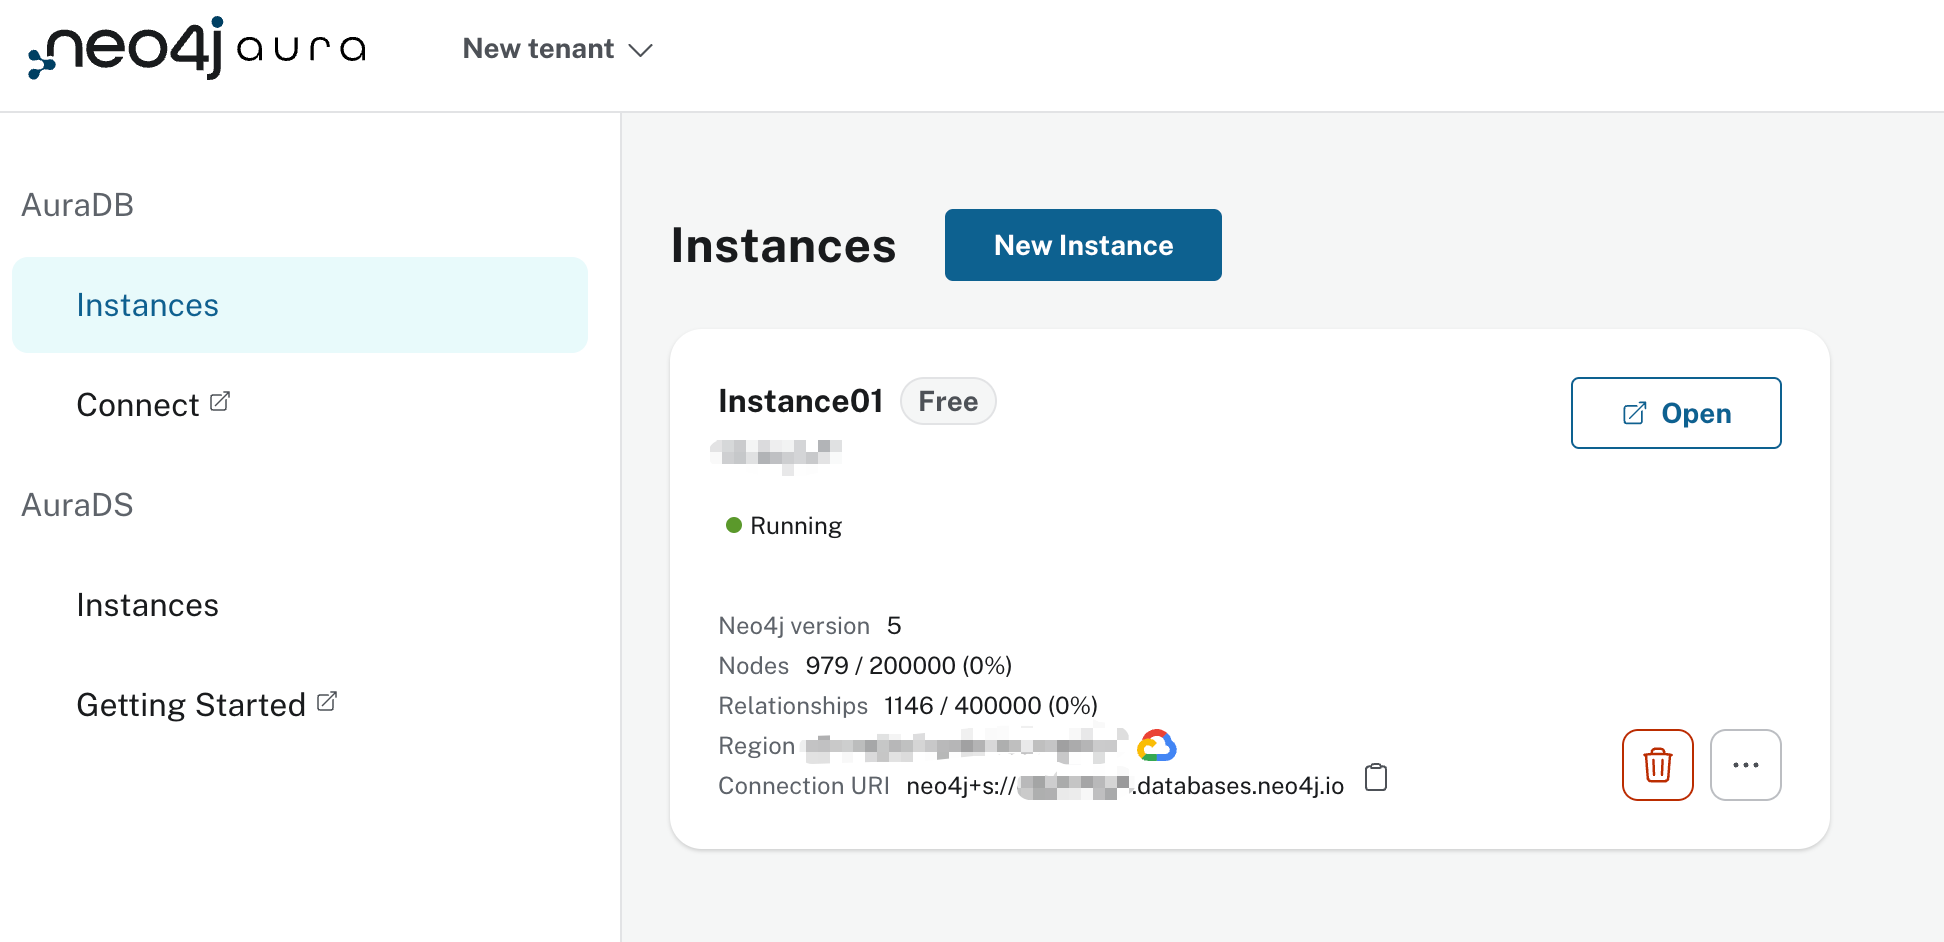

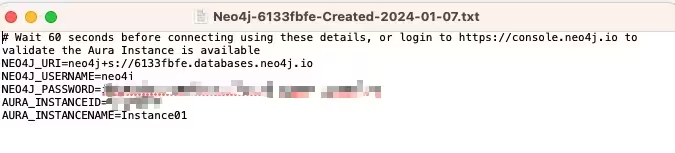

In [ ]:
import time
t0 = time.time()
from llama_index.graph_stores import Neo4jGraphStore

username = "neo4j"
password = "LIZIQE0D4ZicIuNeNc2HmCN2y46Z0DdZXMs2Gf1RV3s"
url = "neo4j+s://eb0db0d6.databases.neo4j.io"
database = "neo4j"

graph_store = Neo4jGraphStore(
    username=username,
    password=password,
    url=url,
    database=database,
)

storage_context = StorageContext.from_defaults(graph_store=graph_store)

# NOTE: can take a while!
index = KnowledgeGraphIndex.from_documents(
    documents,
    storage_context=storage_context,
    max_triplets_per_chunk=2,
    service_context=service_context,
)

neo4j_kg_engine = index.as_query_engine(include_text=False, response_mode="tree_summarize")
# basic_kg_engine = index.as_query_engine(include_text=False, response_mode="tree_summarize", embedding_mode="hybrid", similarity_top_k=5,) # Query with embeddings

query = 'what is the gross cost of operating lease vehicles as of december 31, 2022?' # Should be $6.08 billion
ress = neo4j_kg_engine.query(query)

print(f'Question: {query}:\n\nAnswer: {ress.response}')

t1 = time.time()
print(t1 - t0, 's')

Question: what is the gross cost of operating lease vehicles as of december 31, 2022?:

Answer: The gross cost of operating lease vehicles as of December 31, 2022 is not provided in the given context information.
874.0921339988708 s


### Visulization

In [ ]:
from pyvis.network import Network

g = index.get_networkx_graph()
net = Network(notebook=True, cdn_resources="in_line", directed=True)
net.from_nx(g)
net.show('/content/example.html')

import IPython
IPython.display.HTML(filename='/content/example.html')


/content/example.html


## Using Knowledge Graph with NebulaGraphStore



### Prepare for NebulaGraph: Create a NebulaGraph Database

Create a NebulaGraph Database [Tutorial](https://www.bilibili.com/read/cv29116537/).

Other resources:

> 🚀 [Nebulagraph Workshop Notebook](https://bit.ly/graph-rag-workshop)

> 🚀 [Graph_RAG_LlamaIndex_Workshop](https://colab.research.google.com/drive/1tLjOg2ZQuIClfuWrAC2LdiZHCov8oUbs#scrollTo=4x1mALA1B_-T)


**Note: Below code for NebulaGraph only works locally.**

In [ ]:
from llama_index.graph_stores import NebulaGraphStore
import os

# # Run the code in Nebula Studio
# CREATE SPACE llamaindex(vid_type=FIXED_STRING(256), partition_num=1, replica_factor=1);
# USE llamaindex;
# CREATE TAG entity(name string);
# CREATE EDGE relationship(relationship string);
# CREATE TAG INDEX entity_index ON entity(name(256));

os.environ["NEBULA_USER"] = "root"
os.environ["NEBULA_PASSWORD"] = "nebula"  # default is "nebula"
os.environ["NEBULA_ADDRESS"] = "127.0.0.1:9669"

# Run the code with ngql

# %load_ext ngql
# connection_string = f"--address {os.environ['GRAPHD_HOST']} --port 9669 --user root --password {os.environ['NEBULA_PASSWORD']}"
# %ngql {connection_string}
# %ngql USE demo_basketballplayer
# %ngql CREATE SPACE IF NOT EXISTS llamaindex(vid_type=FIXED_STRING(256), partition_num=1, replica_factor=1);

# %%ngql
# USE llamaindex;
# CREATE TAG IF NOT EXISTS entity(name string);
# CREATE EDGE IF NOT EXISTS relationship(relationship string);
# #%ngql USE llamaindex; CLEAR SPACE llamaindex; # clean graph space

space_name = "your space name" # e.g. llamaindex
edge_types, rel_prop_names = ["relationship"], [
    "relationship"
]  # default, could be omit if create from an empty kg
tags = ["entity"]

graph_store = NebulaGraphStore(
    space_name=space_name,
    edge_types=edge_types,
    rel_prop_names=rel_prop_names,
    tags=tags,
)

storage_context = StorageContext.from_defaults(graph_store=graph_store)

index = KnowledgeGraphIndex.from_documents(
    documents,
    storage_context=storage_context,
    max_triplets_per_chunk=5,
    service_context=service_context,
    space_name=space_name,
    edge_types=edge_types,
    rel_prop_names=rel_prop_names,
    tags=tags,
    # include_embeddings=True,
)

nebula_kg_engine = index.as_query_engine(
    retriever_mode="keyword",
    verbose=True,
    response_mode="tree_summarize",
)

query = 'what is the gross cost of operating lease vehicles as of december 31, 2022?' # Should be $6.08 billion
ress = nebula_kg_engine.query(query)

print(f'Question: {query}:\n\nAnswer: {ress.response}')


### Visulization

In [ ]:
from pyvis.network import Network

g = index.get_networkx_graph()
net = Network(notebook=True, cdn_resources="in_line", directed=True)
net.from_nx(g)
net.show('/content/example.html')

import IPython
IPython.display.HTML(filename='/content/example.html')
